In [1]:
# Set-up
%matplotlib inline
import matplotlib.pyplot as plt

# Python add-ons
import numpy as np
import pandas as pd

# 1. Variability metrics validation

In [2]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

VM = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    VM['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/variability/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    VM['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/variability/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 1.1. Sky conditions

<Figure size 640x480 with 0 Axes>

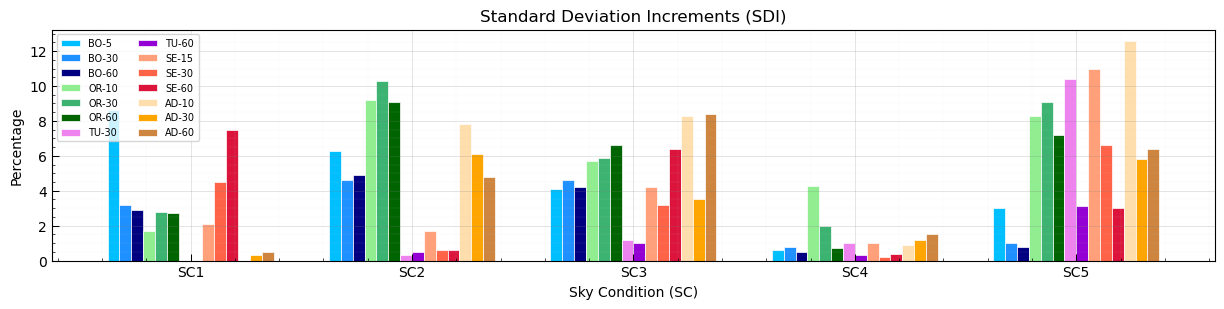

<Figure size 640x480 with 0 Axes>

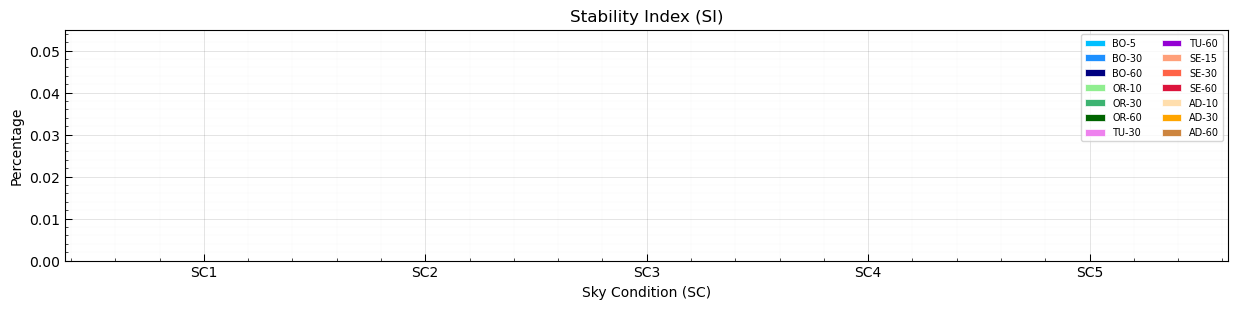

<Figure size 640x480 with 0 Axes>

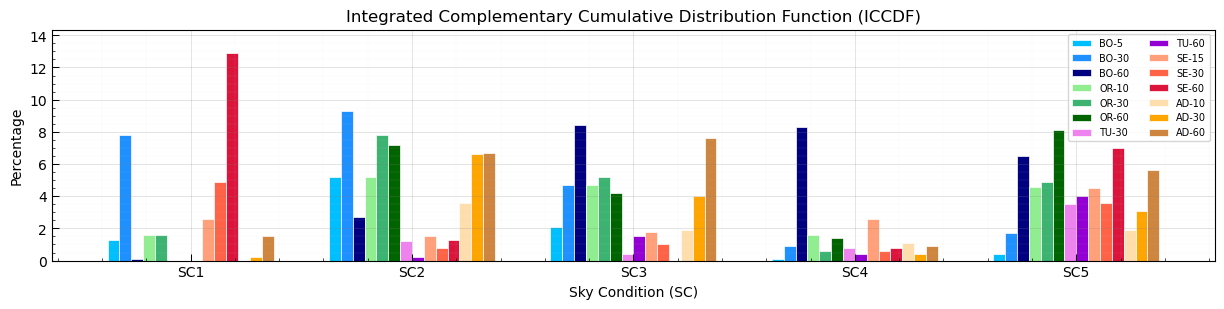

<Figure size 640x480 with 0 Axes>

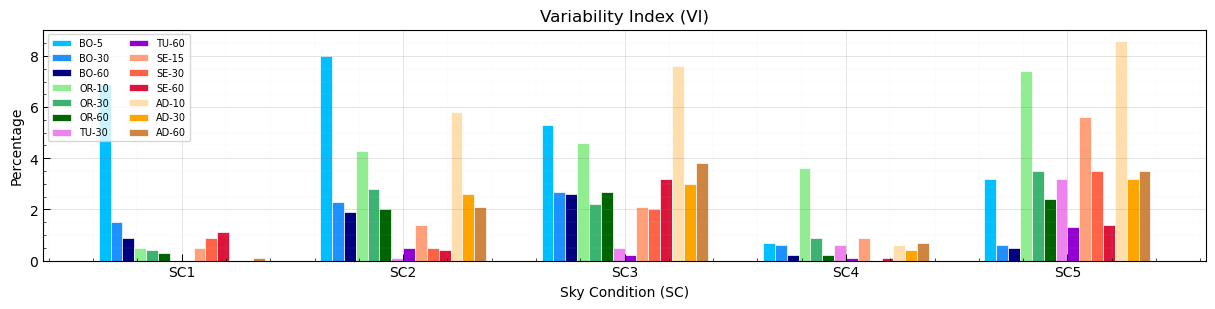

In [3]:
hor = 15
ver = 3

labels = []
colors = []

for i in FILE:
    # Labels
    a = i.split(sep='-')[0][0:2].upper()
    b = i.split(sep='-')[1]

    labels.append(f'{a}-{b}')

    # Colors
    if a == 'BO':
        if b == '30':
            colors.append('dodgerblue')
        elif b == '60':
            colors.append('navy')
        else:
            colors.append('deepskyblue')
    elif a == 'OR':
        if b == '30':
            colors.append('mediumseagreen')
        elif b == '60':
            colors.append('darkgreen')
        else:
            colors.append('lightgreen')
    elif a == 'TU':
        if b == '30':
            colors.append('violet')
        else:
            colors.append('darkviolet')
    elif a == 'SE':
        if b == '30':
            colors.append('tomato')
        elif b == '60':
            colors.append('crimson')
        else:
            colors.append('lightsalmon')
    else:
        if b == '30':
            colors.append('orange')
        elif b == '60':
            colors.append('peru')
        else:
            colors.append('navajowhite')

for i in ['standard_deviation_increments', 'stability_index', 'iccdf', 'variability_index']:
    if i == 'standard_deviation_increments':
        n = 'a'
        fig_title = f'Standard Deviation Increments (SDI)'
    elif i == 'stability_index':
        n = 'b'
        fig_title = 'Stability Index (SI)'
    elif i == 'iccdf':
        n = 'c'
        fig_title = 'Integrated Complementary Cumulative Distribution Function (ICCDF)'
    else:
        n = 'd'
        fig_title = 'Variability Index (VI)'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

    for j in FILE:
        df.loc[j] = VM['BOOTSTRAP_SC'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Sky Condition (SC)')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig12{n}.pdf', dpi=300, bbox_inches='tight')

## 1.2. Months

<Figure size 640x480 with 0 Axes>

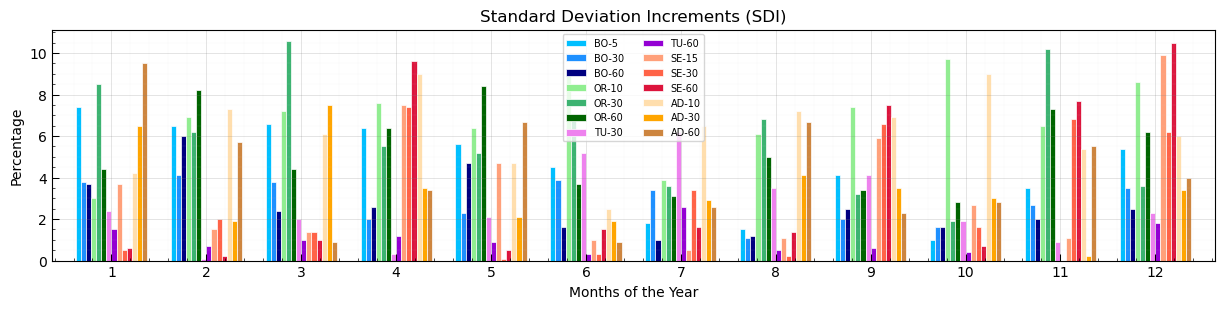

<Figure size 640x480 with 0 Axes>

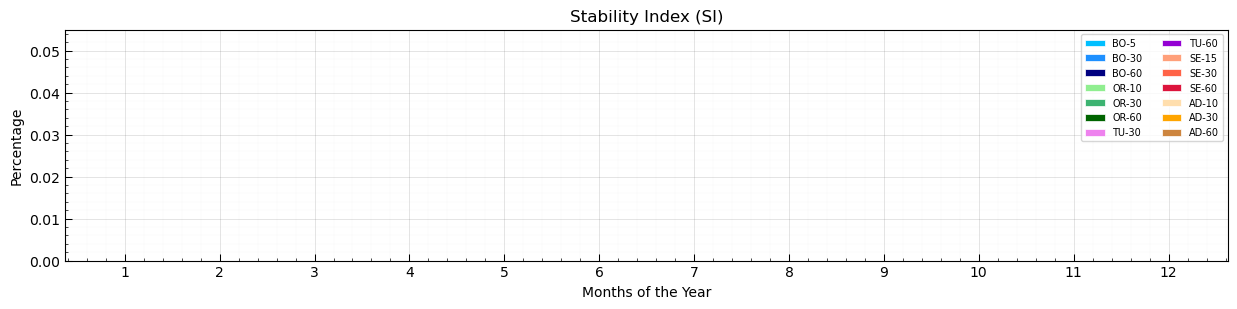

<Figure size 640x480 with 0 Axes>

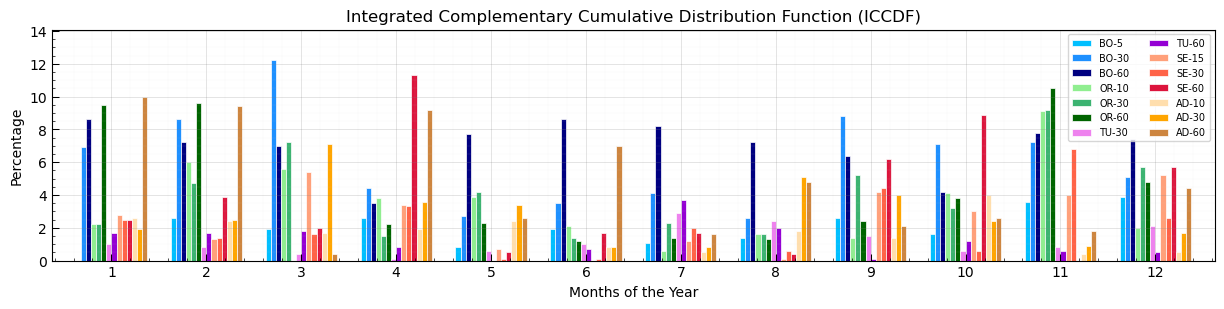

<Figure size 640x480 with 0 Axes>

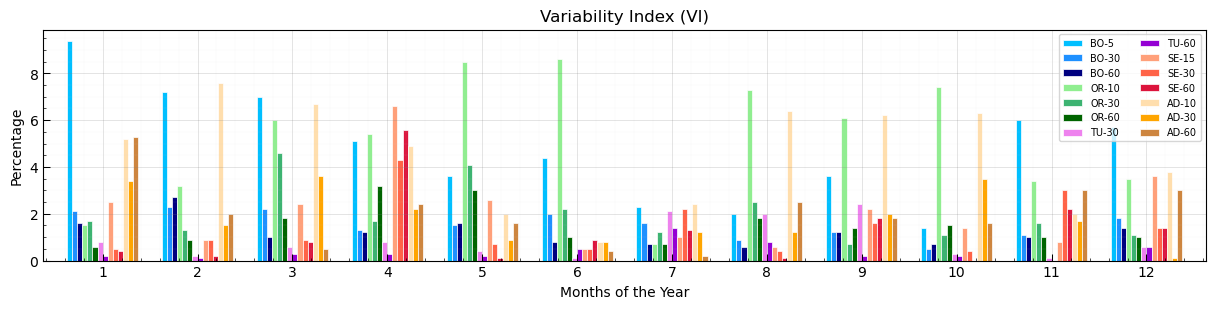

In [4]:
for i in ['standard_deviation_increments', 'stability_index', 'iccdf', 'variability_index']:
    if i == 'standard_deviation_increments':
        n = 'a'
        fig_title = f'Standard Deviation Increments (SDI)'
    elif i == 'stability_index':
        n = 'b'
        fig_title = 'Stability Index (SI)'
    elif i == 'iccdf':
        n = 'c'
        fig_title = 'Integrated Complementary Cumulative Distribution Function (ICCDF)'
    else:
        n = 'd'
        fig_title = 'Variability Index (VI)'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

    for j in FILE:
        df.loc[j] = VM['BOOTSTRAP_MONTH'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Months of the Year')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig13{n}.pdf', dpi=300, bbox_inches='tight')

# 2. Statistical distribution validations

In [5]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

SD = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    SD['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/statistical/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    SD['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/statistical/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 2.1. Sky conditions

<Figure size 640x480 with 0 Axes>

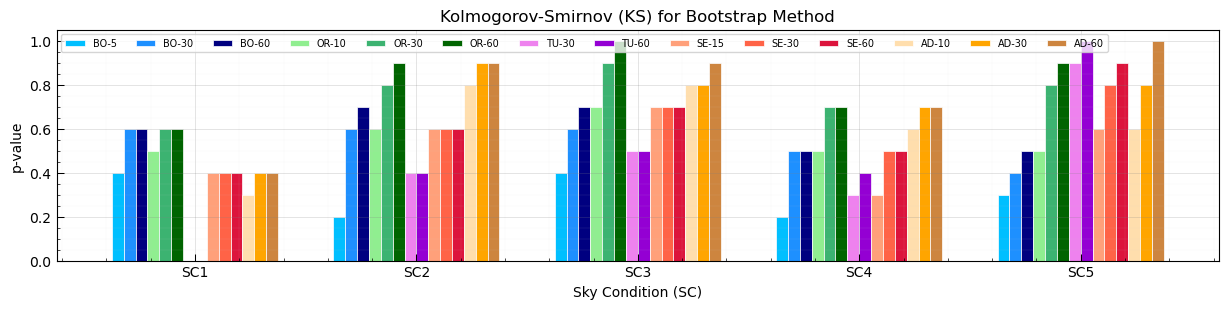

<Figure size 640x480 with 0 Axes>

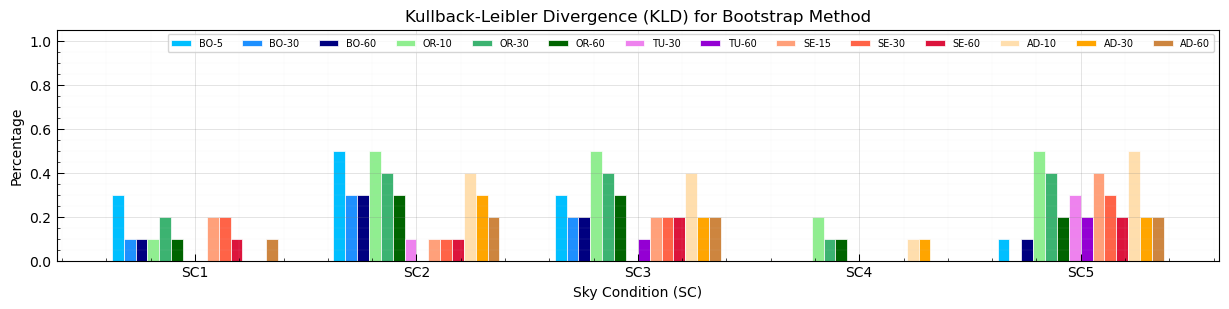

<Figure size 640x480 with 0 Axes>

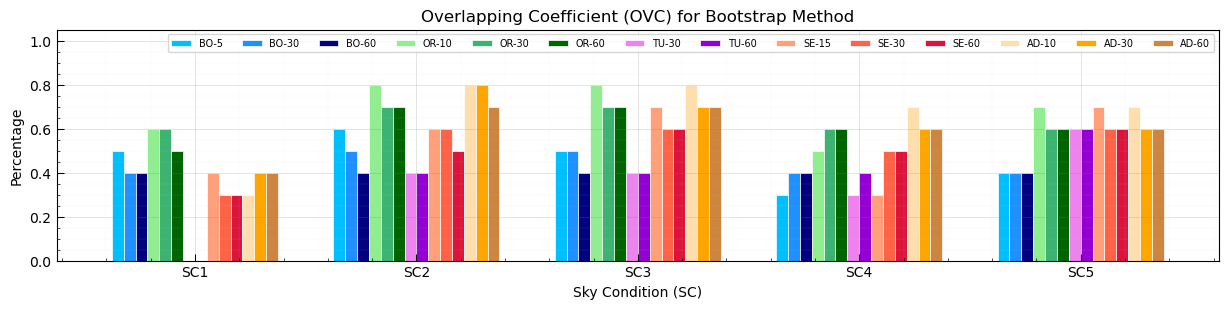

In [6]:
for i in ['kolmogorov_smirnov', 'kullback_leibler_divergence', 'overlapping_coefficient']:
    if i == 'kolmogorov_smirnov':
        n = 'a'
        fig_title = f'Kolmogorov-Smirnov (KS) for Bootstrap Method'
        fig_ylabel = 'p-value'
    elif i == 'kullback_leibler_divergence':
        n = 'b'
        fig_title = 'Kullback-Leibler Divergence (KLD) for Bootstrap Method'
        fig_ylabel = 'Percentage'
    else:
        n = 'c'
        fig_title = 'Overlapping Coefficient (OVC) for Bootstrap Method'
        fig_ylabel = 'Percentage'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

    for j in FILE:
        df.loc[j] = SD['BOOTSTRAP_SC'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel(fig_ylabel)
    plt.xlabel('Sky Condition (SC)')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=14) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig16{n}.pdf', dpi=300, bbox_inches='tight')

## 2.2. Months

<Figure size 640x480 with 0 Axes>

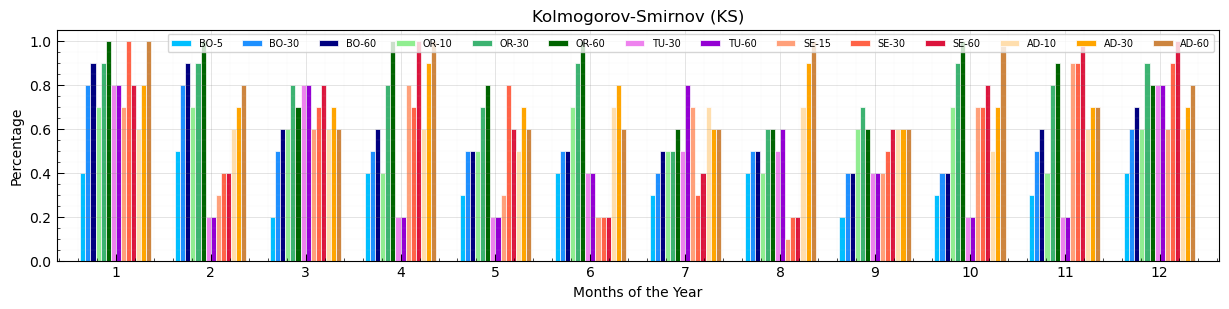

<Figure size 640x480 with 0 Axes>

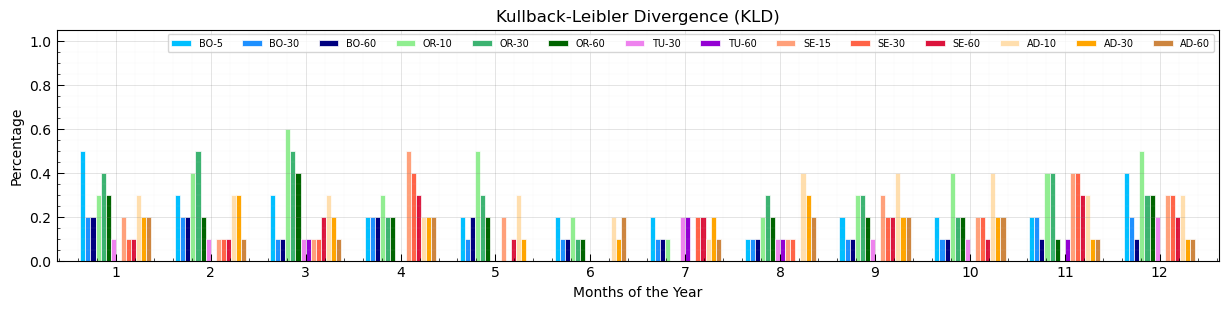

<Figure size 640x480 with 0 Axes>

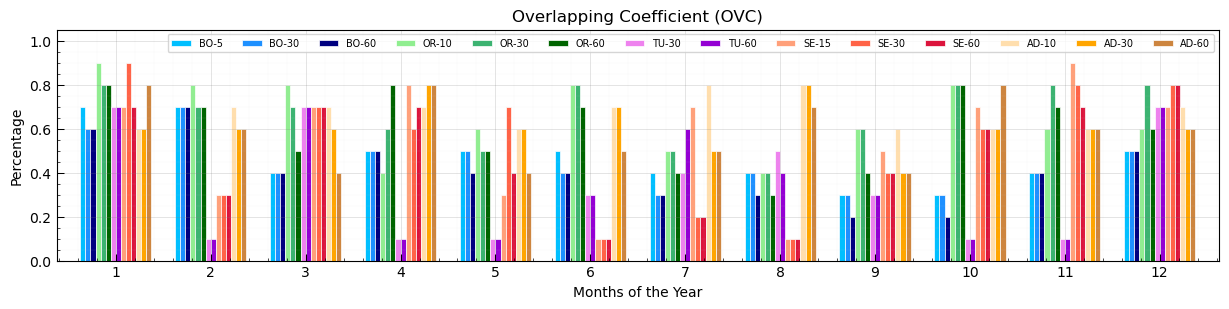

In [7]:
for i in ['kolmogorov_smirnov', 'kullback_leibler_divergence', 'overlapping_coefficient']:
    if i == 'kolmogorov_smirnov':
        n = 'a'
        fig_title = f'Kolmogorov-Smirnov (KS)'
        fig_ylabel = 'p-value'
    elif i == 'kullback_leibler_divergence':
        n = 'b'
        fig_title = 'Kullback-Leibler Divergence (KLD)'
        fig_ylabel = 'Percentage'
    else:
        n = 'c'
        fig_title = 'Overlapping Coefficient (OVC)'
        fig_ylabel = 'Percentage'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

    for j in FILE:
        df.loc[j] = SD['BOOTSTRAP_MONTH'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Months of the Year')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=14) #, bbox_to_anchor=(1, 1))
    plt.savefig(f'../figs/fig17{n}.pdf', dpi=300, bbox_inches='tight')

# 3. Energy production validation

In [8]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

EM = {'BOOTSTRAP_MONTH': {},
      'BOOTSTRAP_SC': {}}

for i in FILE:
    EM['BOOTSTRAP_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/energy/{i}/bootstrap_month.csv', index_col='month').round(decimals=1)
    EM['BOOTSTRAP_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/energy/{i}/bootstrap_sc.csv', index_col='sc').round(decimals=1)

## 3.1. Sky conditions

<Figure size 640x480 with 0 Axes>

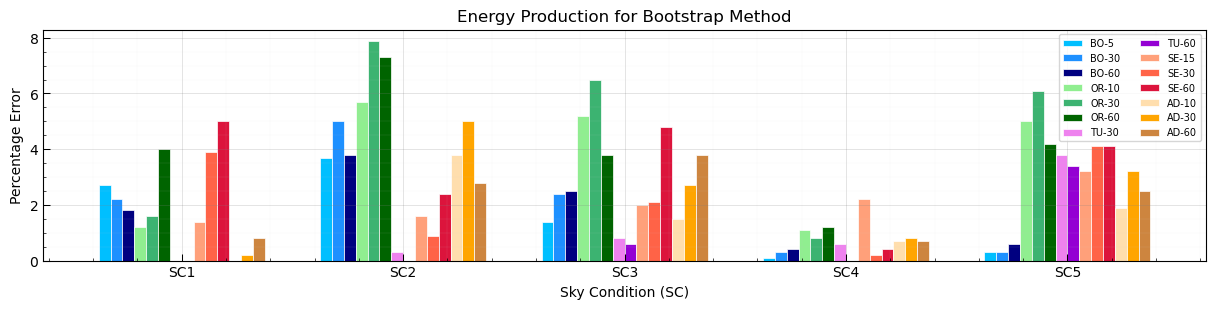

In [9]:
fig_title = 'Energy Production for Bootstrap Method'
fig_ylabel = 'Percentage Error'

# pd.DataFrame
df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

for j in FILE:
    df.loc[j] = EM['BOOTSTRAP_SC'][j]['percentage_error'].values

df.index = labels

plt.figure()

df.T.plot(kind='bar',
            color=colors,
            edgecolor='white',
            linewidth=0.5,
            width=0.75,
            label=labels,
            figsize=(hor,ver))

plt.title(fig_title)
plt.ylabel(fig_ylabel)
plt.xlabel('Sky Condition (SC)')
plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(0, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
plt.tight_layout
plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
plt.savefig(f'../figs/fig19a.pdf', dpi=300, bbox_inches='tight')

## 3.2. Months

<Figure size 640x480 with 0 Axes>

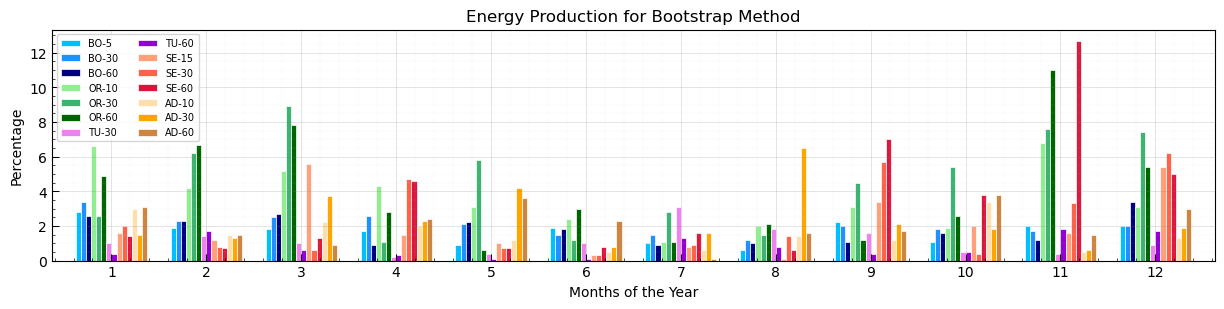

In [10]:
fig_title = 'Energy Production for Bootstrap Method'
fig_ylabel = 'Percentage Error'

# pd.DataFrame
df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

for j in FILE:
    df.loc[j] = EM['BOOTSTRAP_MONTH'][j]['percentage_error'].values

df.index = labels

plt.figure()

df.T.plot(kind='bar',
            color=colors,
            edgecolor='white',
            linewidth=0.5,
            width=0.75,
            label=labels,
            figsize=(hor,ver))

plt.title(fig_title)
plt.ylabel('Percentage')
plt.xlabel('Months of the Year')
plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(0, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
plt.tight_layout
plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
plt.savefig(f'../figs/fig19b.pdf', dpi=300, bbox_inches='tight')